In [2]:
"""
Given a text corpus, generate a word cloud

start with https://www.datacamp.com/community/tutorials/wordcloud-python
"""

'\nGiven a text corpus, generate a word cloud\n\nstart with https://www.datacamp.com/community/tutorials/wordcloud-python\n'

In [198]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.pyplot import imshow
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
csv_path = "C:/Users/dori/artech/artech-2018/data/gov_files/f_07fc9ed5-1ac6-4752-a8c3-90781b3369ad.csv"
df = pd.read_csv(csv_path, usecols=["FullDescription"])
print(df.head())

                                     FullDescription
0  <p style="text-align: right;">מוזיאון ישראל הו...
1  <p style="text-align: right;">מוזיאון ישראל הו...
2  <p style="text-align: right;">מוזיאון ישראל הו...
3  <p style="text-align: right;">מוזיאון ישראל הו...
4  <p style="text-align: right;">מוזיאון ישראל הו...


In [55]:
def is_english(w):
    if ord(w.lstrip()[0]) < 128:
        return True
    else:
        return False

In [56]:
def invert_hebrew(w):
    if is_english(w):
        return w
    else:
        return w[::-1]

In [197]:
def calc_save_word_cloud(text=df.FullDescription[0].split(), out_path="../data/outputs/wordcloud_0.jpg", mask=None):
    word_list = [invert_hebrew(w) for w in text]
    text = ' '.join(word_list)
    wordcloud = WordCloud(max_words=1000, 
                          background_color="white", 
                          font_path="C:/Windows/Fonts/arial.ttf", 
                          mask=mask).generate(text)
    print("wordcloud type = ")
    print(type(wordcloud))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    #plt.show()
    plt.savefig(out_path)

wordcloud type = 
<class 'wordcloud.wordcloud.WordCloud'>


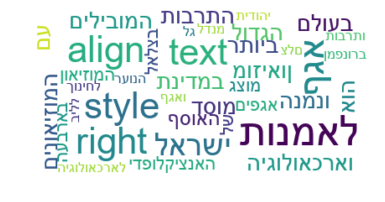

In [154]:
calc_save_word_cloud()

In [164]:
def get_image(image_path):
    res_im  = Image.open(image_path)
    res_im  = res_im.rotate(-90)
    #imshow(np.asarray(res_im))
    return res_im

In [177]:
def get_mask(orig_im):
    eq_im = ImageOps.equalize(orig_im)
    gray_im = eq_im.convert(mode="LA")
    threshold=200
    bin_im = gray_im.point(lambda p: p > threshold and 255)
    imshow(bin_im)
    return bin_im

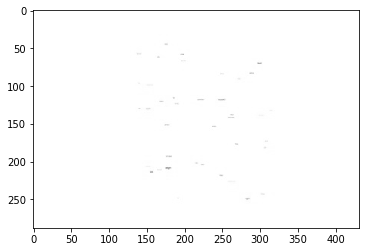

In [169]:
wc_path = "../data/outputs/wordcloud_0.jpg"
wc_im = Image.open(wc_path)
wc_gray = wc_im.convert(mode="LA")
imshow(wc_gray)

(3888, 2592)


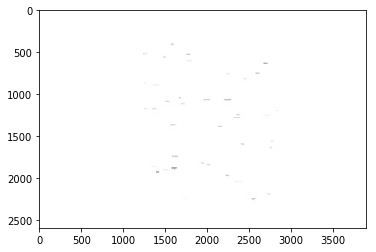

In [170]:
wc_gray = wc_gray.resize((wc_gray.size[0]*9, wc_gray.size[1]*9))
imshow(wc_gray)
print(wc_gray.size)

In [171]:
from PIL import ImageOps
dori_x, dori_y = contrast_applied.size
print(dori_x)
print(dori_y)
wc_x, wc_y = wc_gray.size
print(wc_x)
delta_w = dori_x - wc_x
delta_h = dori_y - wc_y
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
new_wc = ImageOps.expand(wc_gray, padding)
print(new_wc.size)
print(contrast_applied.size)

4032
3024
3888
(4032, 3024)
(4032, 3024)


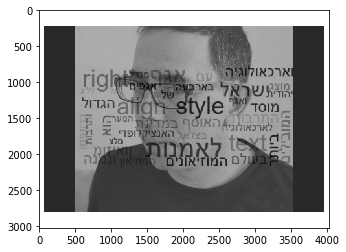

In [105]:
from PIL import ImageChops
mult_im = ImageChops.multiply(new_wc, contrast_applied)
imshow(mult_im)

In [101]:
print(contrast_applied.mode)
print(new_wc.mode)

LA
L


In [201]:
def get_text():
    csv_path = "../data/gov_files/f_07fc9ed5-1ac6-4752-a8c3-90781b3369ad.csv"
    df = pd.read_csv(csv_path, usecols=["FullDescription"])
    df.dropna(inplace=True)
    return ' '.join(df.FullDescription).split()

In [182]:
def get_image_w_cloud(image_path, dataset_path):
    orig_im = get_image(image_path)
    orig_im = orig_im.crop((500,0, 3500,3024))
    #imshow(orig_im)
    print(orig_im.size)
    mask_im = get_mask(orig_im)
    imshow(mask_im)
    calc_save_word_cloud(text=get_text(),
                         mask=np.asarray(mask_im))
    #imshow(mask_im)

(3000, 3024)
wordcloud type = 
<class 'wordcloud.wordcloud.WordCloud'>


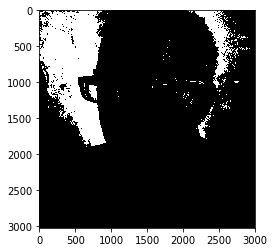

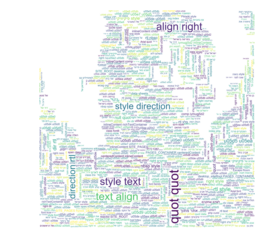

In [202]:
dori_image_path = "../data/inputs/images/20181101_150630.jpg"
get_image_w_cloud(dori_image_path, "")

### 